In [1]:
import random
import numpy as np

random.seed()
len = 10
mu = 0
sig = 1
numeri_normali = np.random.normal(mu, sig, len)

print("Sequenza random generata:", numeri_normali)

Sequenza random generata: [-0.02166349 -0.47620899 -1.09514608 -0.70359514  1.33767676 -0.54564461
  1.27050332  0.05864333 -0.20764183  2.01064627]


## Benourlli
Scrivere un esercizio che generi numeri random che seguano una distribuzione di Benourlli

In [2]:
def bernoulli(x):
    x = np.random.rand()
    if x < p:
        return 1
    return 0

p = 0.5
n = 1000
x = np.array([bernoulli(p) for _ in range(n)])
#print(f'Sequenza causale: {x}')

successi = np.sum(x)
print(f'Numero di successi: {successi/n*100:.2f}%')

Numero di successi: 50.50%


In [3]:
x = np.random.binomial(1, p, n)

successi = np.sum(x)
print(f'Numero di successi: {successi/n*100:.2f}%')

Numero di successi: 54.20%


## Multinomiale
Scrivere un esercizio che generi numeri random che seguano una distribuzione di Multinomiale. 

[1/4, 1/2, 1/4]

Generare 2000 di questi numeri e costruire un'istogramma verificando l'accordo con la distribuzione teorica seguita

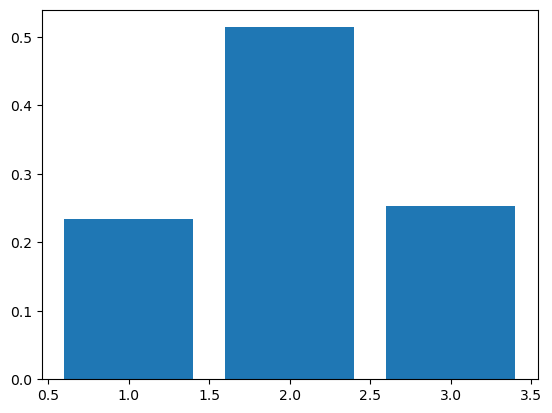

In [4]:
import matplotlib.pyplot as plt

def multinomiale(p):
    m = p.size
    F = np.cumsum(p)
    xi = np.random.rand()
    X = np.nonzero(xi < F)[0][0]+1
    return X
    
n = 2000
p = np.array([1/4, 1/2, 1/4])    
    
x = np.array([multinomiale(p) for _ in range(n)])

m = p.size
F = np.zeros(m)
for i in range(m):
    F[i] = np.sum(x == i+1)

x = np.arange(m)+1
F /= n
plt.bar(x, F)
plt.show()

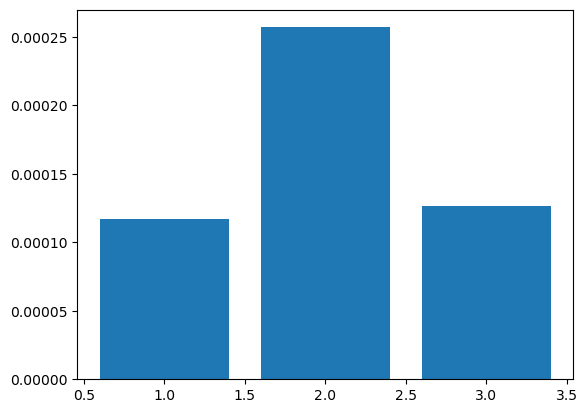

In [5]:
random_numbers = np.random.multinomial(2000, [1/4, 1/2, 1/4])
random_numbers

x = np.arange(m)+1
F /= n
plt.bar(x, F)
plt.show()

## Uniforme
Generare numeri random con distribuzione uniforme in AB. Verificare che sia invertibile con un istogramma

Densità teorica:0.5


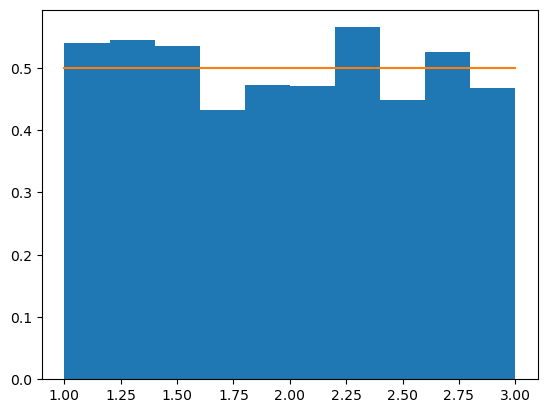

In [6]:
from scipy.stats import probplot, uniform

a = 1
b = 3
n = 2000
x = np.random.rand(n)

y = a + x*(b-a)

p = 1/(b-a)
print(f'Densità teorica:{p}')

xx = np.linspace(a,b,1000)
yy = uniform.pdf(xx, a, b-a)

plt.hist(y, density=True)
plt.plot(xx, yy)

plt.show()

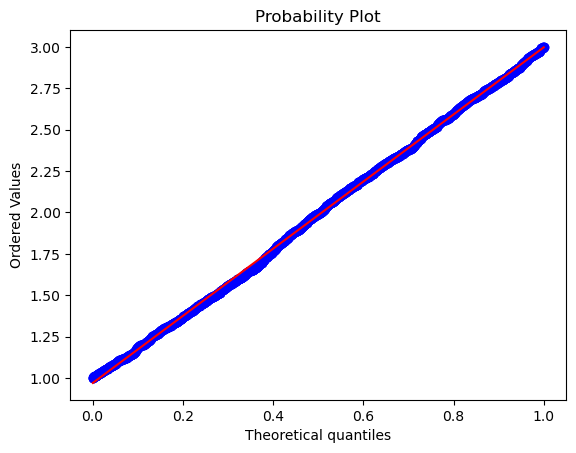

In [7]:
fig, ax = plt.subplots(1,1)
probplot(y, dist=uniform, plot=ax)
plt.show()

## Esponenziale
Generare numeri random con distribuzione esponenziale di parametro Lambda, Verificare che sia invertibile con un istogramma

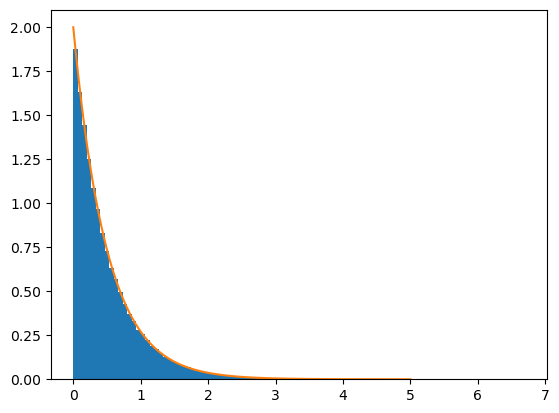

In [8]:
from scipy.stats import expon

lam = 2
n = 200000
x = np.random.rand(n)

y = -np.log(x)/lam

xx = np.linspace(0, 5, n)
yy = expon.pdf(xx, scale=1/lam)

plt.hist(y, bins=100, density=True)
plt.plot(xx, yy)

plt.show()

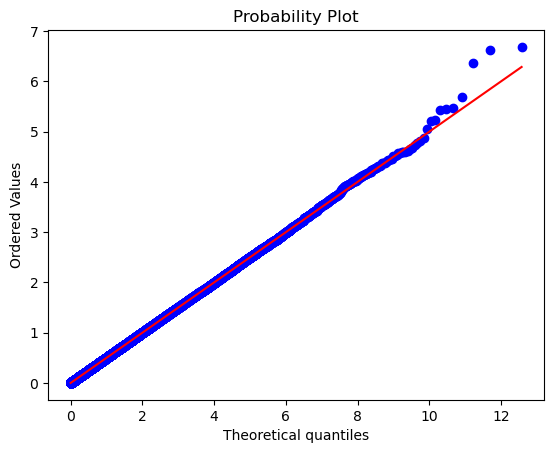

In [9]:
fig, ax = plt.subplots(1,1)
probplot(y, dist=expon, plot=ax)
plt.show()

## Normale

Generare numeri random con distribuzione normale. Verificare che sia invertibile con un istogramma

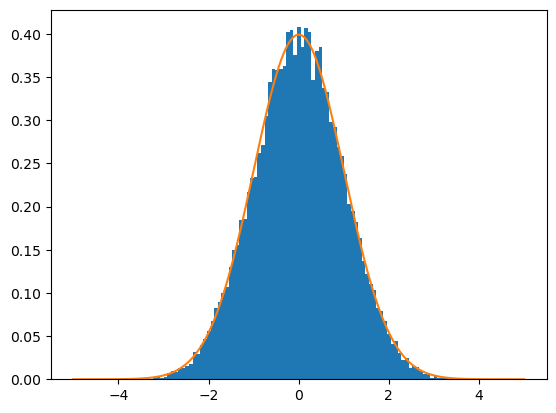

In [10]:
from scipy.stats import norm

n = 20000
x = np.random.rand(n)

xi1 = x[0:int(n/2)]
xi2 = x[int(n/2): n]

eta1 = np.sqrt(-2*np.log(xi1))*np.cos(2*np.pi*xi2)
eta2 = np.sqrt(-2*np.log(xi1))*np.sin(2*np.pi*xi2)

y = np.concatenate((eta1, eta2))
xx = np.linspace(-5, 5, 1000)
yy = norm.pdf(xx)

plt.hist(y, bins=100, density=True)
plt.plot(xx, yy)

plt.show()

## ESERCIZI SA SVOLGERE


## Generare numeri pseudocasuali con distribuzione f(x) = (1+cos x)/2Pigreco

Tempo computazionale: 0.32 secondi


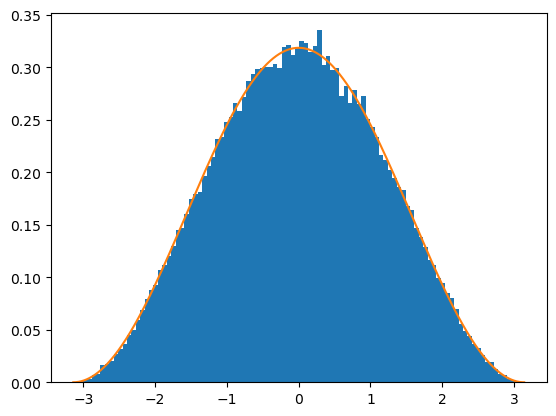

In [11]:
import time

def f(x):
    return (1 + np.cos(x)) / (2 * np.pi)

def rigetto(a, b, M):
    while True:
        r1 = np.random.rand()
        r2 = np.random.rand()
        xi = a + r1 * (b - a)
        eta = M * r2
        if eta <= f(xi):
            break
    return xi

a = -np.pi
b = np.pi
n = 100000
M = 1 / np.pi

start_time = time.time()  # Registra il tempo di inizio

x = np.zeros(n)
for i in range(n):
    x[i] = rigetto(a, b, M)

end_time = time.time()  # Registra il tempo di fine
elapsed_time = end_time - start_time
print(f"Tempo computazionale: {elapsed_time:.2f} secondi")

xx = np.linspace(a, b, 1000)
yy = f(xx)

fig, ax = plt.subplots(1, 1)
ax.hist(x, bins=100, density=True)
plt.plot(xx, yy)
plt.show()

Tempo computazionale: 3.24 secondi
Tempo computazionale: 0.05 minuti


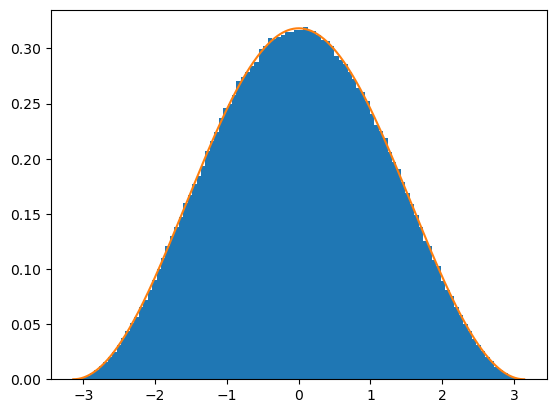

In [14]:
n = 1000000
M = 1 / np.pi

start_time = time.time()  # Registra il tempo di inizio

x = np.zeros(n)
for i in range(n):
    x[i] = rigetto(a, b, M)

end_time = time.time()  # Registra il tempo di fine
elapsed_time = end_time - start_time
print(f"Tempo computazionale: {elapsed_time:.2f} secondi")
print(f'Tempo computazionale: {np.round(elapsed_time/60, 2)} minuti')

xx = np.linspace(a, b, 1000)
yy = f(xx)

fig, ax = plt.subplots(1, 1)
ax.hist(x, bins=100, density=True)
plt.plot(xx, yy)
plt.show()

# Monte Carlo

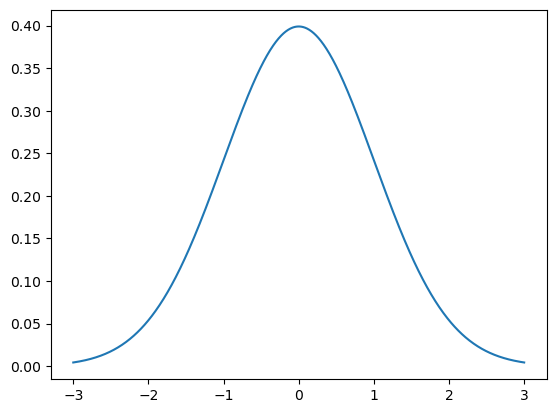

In [20]:
def fun(x):
    y = np.exp(-x**2/2)/np.sqrt(2*np.pi)
    return y

a = 0.5
b = 2

xx = np.linspace(-3, 3, 1000)
yy = norm.pdf(xx)
plt.plot(xx, yy)
plt.show()

In [44]:
M = 0.45 # preso dal grafico
n = 100000
ns = 0 # numero di hit
for i in range(n):
    r1 = np.random.rand()
    r2 = np.random.rand()
    xi = a + r1*(b-a)
    eta = r2*M
    if f(xi) <= eta:
        ns += 1

p = ns/n
I = p*M*(b-a)
I

0.36848250000000005

In [50]:
phi = norm.cdf(b)-norm.cdf(a)
phi

0.2857874067778077